In [1]:
import numpy as np
import pandas as pd
import toolz as tz
import itertools as it
import functools as ft

import rospy
from rosh import Bagy


from robot_wardrive.msg import SignalLocation

# Load Data

In [2]:
msgs = None
columns=['x', 'y', 'link']
# bagy_name = '2015-05-28_signal_location_trunkated.bagy'
bagy_name = '2015-05-28_signal_location.bagy'
with Bagy(bagy_name, 'r', SignalLocation) as bagy:
    msgs = pd.DataFrame([(msg.pose.position.x, msg.pose.position.y, msg.level) for msg in bagy], columns=columns)
    

        
        
        

In [3]:
msgs.head()

,x,y,link
0,11.803684,86.801627,-66
1,11.807398,86.842084,-66
2,11.802938,87.034106,-63
3,11.790895,87.047752,-63
4,11.797792,87.251747,-64


In [4]:
msgs.describe()

,x,y,link
count,5801.000000,5801.000000,5801.000000
mean,12.271759,62.765342,-40.107740
std,1.076137,27.336545,28.129533
min,7.945095,4.703987,-87.000000
25%,11.861756,39.231444,-70.000000
50%,11.982055,62.085303,-23.000000
75%,12.174500,87.081846,-20.000000
max,18.140359,109.040471,0.000000


# Plots

## hexbin

Populating the interactive namespace from numpy and matplotlib


(26, 110)

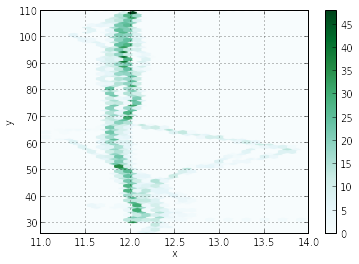

In [8]:
%pylab inline

msgs.plot(kind='hexbin', x='x', y='y', gridsize=100, reduce_C_function=np.max)
plt.xlim((11,14))
plt.ylim((26,110))


## Scatter

(26, 110)

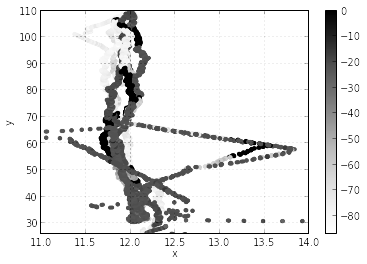

In [9]:
msgs.plot(kind='scatter', x='x', y='y', c='link', linewidth=0)
plt.xlim((11,14))
plt.ylim((26,110))

## Colormesh

In [10]:
# plt.pcolormesh(msgs.x.values, msgs.y.values, msgs.link.values)

#Rounding 

In [11]:
rounded = msgs.apply(np.round, decimals=1)

In [12]:
rounded.groupby(['x', 'y']).mean().reset_index(inplace=True)

In [13]:
#rounded['link'] = rounded['link'] * -1

## Plot rounded

In [70]:
# Set image limits
extent=[min(rounded.x - 6.55), max(rounded.x + 5.55),
       min(rounded.y - 4.6),max(rounded.y + 11.4)]

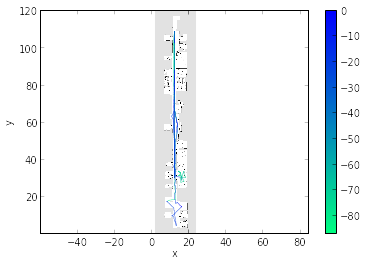

In [71]:
rounded.plot(kind='scatter', x='x', y='y', c='link',
             s=0.15, linewidth=0,
             grid=None, cmap="winter_r")  # cmap=*_r is reversed version of the cmap
img = plt.imread('roboticslab_complete_clean.png')
implot = plt.imshow(img, extent=extent, cmap='Greys_r')
axes().set_aspect('equal', 'datalim')
plt.grid(b=None)
plt.savefig('wifi_coverage.pdf', grid=None, transparent=True, dpi=300)

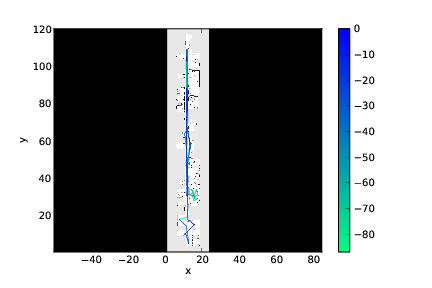

In [69]:
from wand.image import Image as WImage
img = WImage(filename='wifi_coverage.pdf')
img

# Trying Meshgrid 

In [20]:
xx, yy = np.meshgrid(rounded.x, rounded.y)
print xx, yy

ValueError: array is too big.

In [26]:
df = pd.DataFrame(rounded.link, index=rounded.x, columns=rounded.y)
